In [1]:
import sys
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
from tqdm import tqdm
import pickle
from numpy.testing import assert_array_equal

sys.path.insert(0, '/Users/davide/Documents/Work/github/EEG/script/utils/')

from utils.plot_utils import plot_between_cond, plot_across_dur
from utils.load_utils import get_data, reshape_data
from utils.stats_utils import get_boot_stats, get_peaks

plt.rcParams.update({
    'lines.linewidth': 2,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'xtick.major.size': 4,
    'ytick.major.size': 4,
    'xtick.major.width': 2,
    'ytick.major.width': 2,
    'axes.labelsize': 16,
    'axes.titlesize': 18,
    'legend.fontsize': 12,
    'axes.grid': True,
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    'grid.alpha': 0.5,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.edgecolor': 'black',
    'axes.linewidth': 2
})

## Object decoding analyses

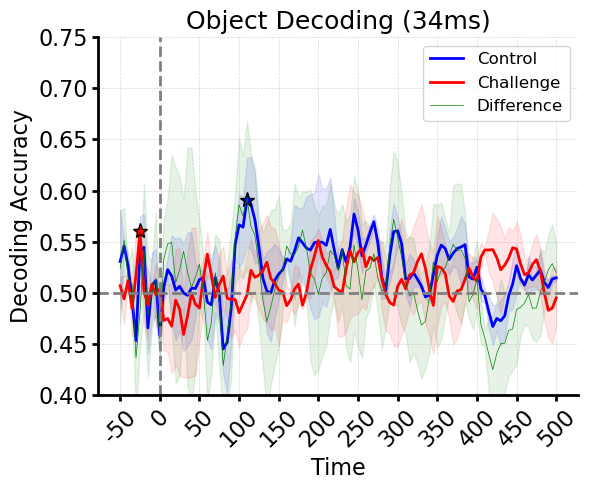

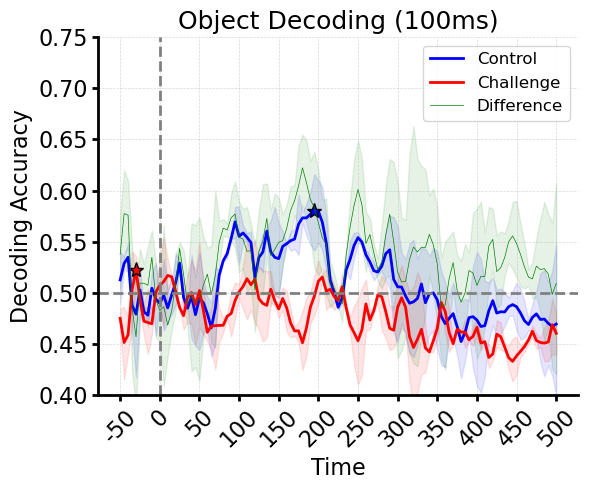

<Figure size 640x480 with 0 Axes>

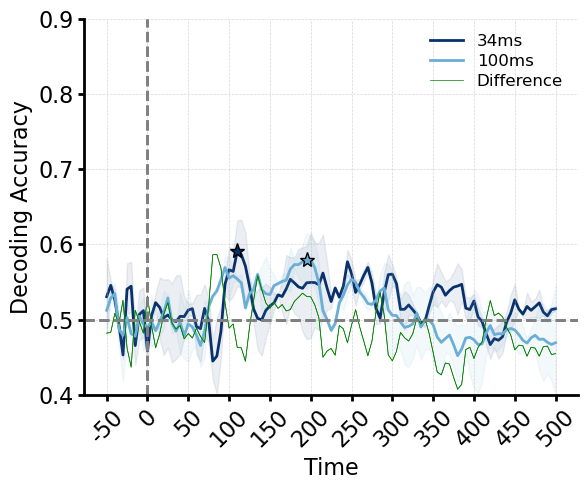

<Figure size 640x480 with 0 Axes>

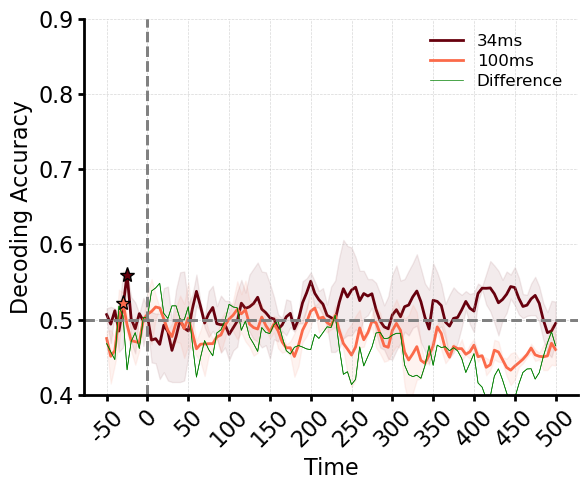

In [5]:
# Load data
sub_to_use = [6,7]  # List of subjects to use
diag_list = []

# Fetch data for each subject and append to diag_list
for s in sub_to_use:
    act_diag = get_data(str(s), 50)  # Function to fetch data ('random', 'random_separated_img', 'fixed')
    diag_list.append(act_diag)

# Reshape the data for each subject into the appropriate format
all_subj_con, all_subj_chal = reshape_data(diag_list)

# Get bootstrapped means and confidence intervals
boot_mean_con, boot_mean_chal, boot_mean_diff, boot_CI_con, boot_CI_chal, boot_CI_diff = get_boot_stats(
    all_subj_con, all_subj_chal, num_samples=100)

# Get peak heights and latencies
avg_height_lat = get_peaks(boot_mean_con, boot_mean_chal)

# Plot between conditions (control vs challenge) and across durations
plot_between_cond(boot_mean_con, boot_mean_chal, avg_height_lat, boot_CI_con, boot_CI_chal, boot_mean_diff, boot_CI_diff)
plot_across_dur(boot_mean_con, boot_mean_chal, avg_height_lat, boot_CI_con, boot_CI_chal, boot_mean_diff, boot_CI_diff)

## Image Decoding Analysis


In [ ]:
# To be implemented